# Análise gráfica PV Osório 2019

## Preparando ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
sns.set(rc={'figure.figsize':(15, 9)})

## Carregando os dados

In [3]:
pv = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/dias-tipicos/main/data/pv_osorio_2019.csv', header=3)
pv.sample(5)

,time,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature
5847,2019-09-01 15:00,2019-09-01 12:00,0.801,0.908,0.109,16.717
8565,2019-12-23 21:00,2019-12-23 19:00,0.030,0.000,0.048,23.082
1232,2019-02-21 08:00,2019-02-21 05:00,0.000,0.000,0.000,21.418
5512,2019-08-18 16:00,2019-08-18 13:00,0.411,0.198,0.279,15.259
2200,2019-04-02 16:00,2019-04-02 13:00,0.669,0.709,0.167,28.182


In [4]:
pv.dtypes

time                   object
local_time             object
electricity           float64
irradiance_direct     float64
irradiance_diffuse    float64
temperature           float64
dtype: object

In [5]:
del pv['time']
pv['local_time'] = pd.to_datetime(pv['local_time'])
print(pv.dtypes)
pv.sample(5)

local_time            datetime64[ns]
electricity                  float64
irradiance_direct            float64
irradiance_diffuse           float64
temperature                  float64
dtype: object


,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature
8100,2019-12-04 10:00:00,0.504,0.412,0.206,23.511
864,2019-02-05 22:00:00,0.000,0.000,0.000,20.307
3616,2019-05-31 13:00:00,0.474,0.359,0.205,18.895
4485,2019-07-06 18:00:00,0.000,0.000,0.000,7.471
7622,2019-11-14 12:00:00,0.474,0.176,0.401,22.936


In [6]:
pv.describe()

,electricity,irradiance_direct,irradiance_diffuse,temperature
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.178378,0.151754,0.070931,19.784855
std,0.248617,0.259802,0.096298,4.717214
min,0.000000,0.000000,0.000000,4.599000
25%,0.000000,0.000000,0.000000,16.881250
50%,0.001000,0.000000,0.006000,20.032000
75%,0.345000,0.197000,0.117000,22.949000
max,0.839000,0.989000,0.446000,33.524000


## Análise correlação

In [7]:
corr = pv[['electricity', 'irradiance_direct',	'irradiance_diffuse',	'temperature']].corr()
corr

,electricity,irradiance_direct,irradiance_diffuse,temperature
electricity,1.000000,0.954326,0.670998,0.365949
irradiance_direct,0.954326,1.000000,0.422666,0.304358
irradiance_diffuse,0.670998,0.422666,1.000000,0.412539
temperature,0.365949,0.304358,0.412539,1.000000


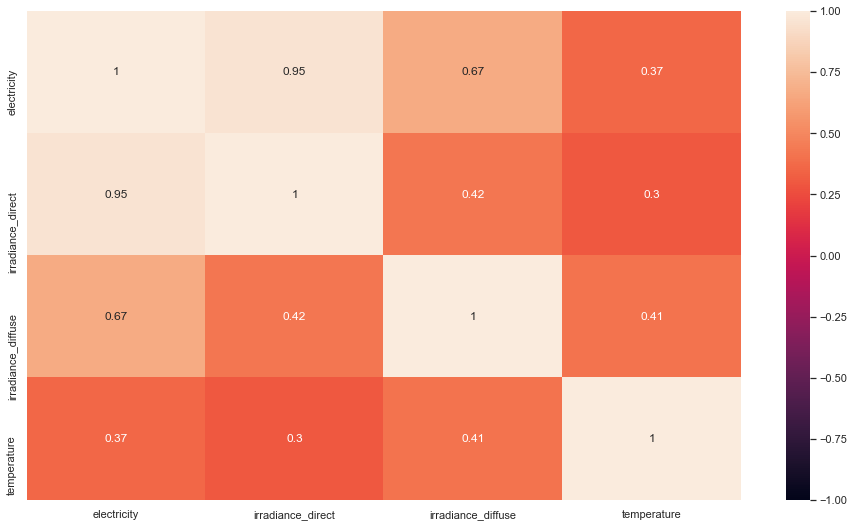

In [8]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True);

## Visualizando a time series

### `irradiance_direct`

Criando as variáveis de análise (aumento, aceleração e crescimento)

In [9]:
pv['idirect_aumento'] = pv[['irradiance_direct']].diff()
pv['idirect_aceleracao'] = pv['idirect_aumento'].diff()
pv['idirect_media_movel_dia'] = pv['irradiance_direct'].rolling(24).mean()
pv['idirect_media_movel_semana'] = pv['irradiance_direct'].rolling(24 * 7).mean()

crescimento = np.array([np.NaN])
for index in range(1, len(pv.irradiance_direct)):
    anterior = pv.irradiance_direct[index - 1]
    c = round(((pv.irradiance_direct[index] / anterior) - 1), 2) if anterior > 0 else 0
    crescimento = np.append(crescimento, c)
pv['idirect_crescimento'] = crescimento
pv

,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,idirect_aumento,idirect_aceleracao,idirect_media_movel_dia,idirect_media_movel_semana,idirect_crescimento
0,2018-12-31 22:00:00,0.000,0.000,0.000,24.202,NaN,NaN,NaN,NaN,NaN
1,2018-12-31 23:00:00,0.000,0.000,0.000,23.979,0.000,NaN,NaN,NaN,0.00
2,2019-01-01 00:00:00,0.000,0.000,0.000,23.806,0.000,0.000,NaN,NaN,0.00
3,2019-01-01 01:00:00,0.000,0.000,0.000,23.679,0.000,0.000,NaN,NaN,0.00
4,2019-01-01 02:00:00,0.000,0.000,0.000,23.633,0.000,0.000,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 17:00:00,0.215,0.037,0.231,29.056,-0.013,0.002,0.12700,0.192190,-0.26
8756,2019-12-31 18:00:00,0.126,0.014,0.149,28.214,-0.023,-0.010,0.12425,0.191524,-0.62
8757,2019-12-31 19:00:00,0.028,0.000,0.047,26.889,-0.014,0.009,0.12425,0.191524,-1.00
8758,2019-12-31 20:00:00,0.000,0.000,0.001,25.714,0.000,0.014,0.12425,0.191524,0.00


Plotando a relação da variável com o tempo na mesma figura para comparação.

In [10]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento'],
      dtype='object')

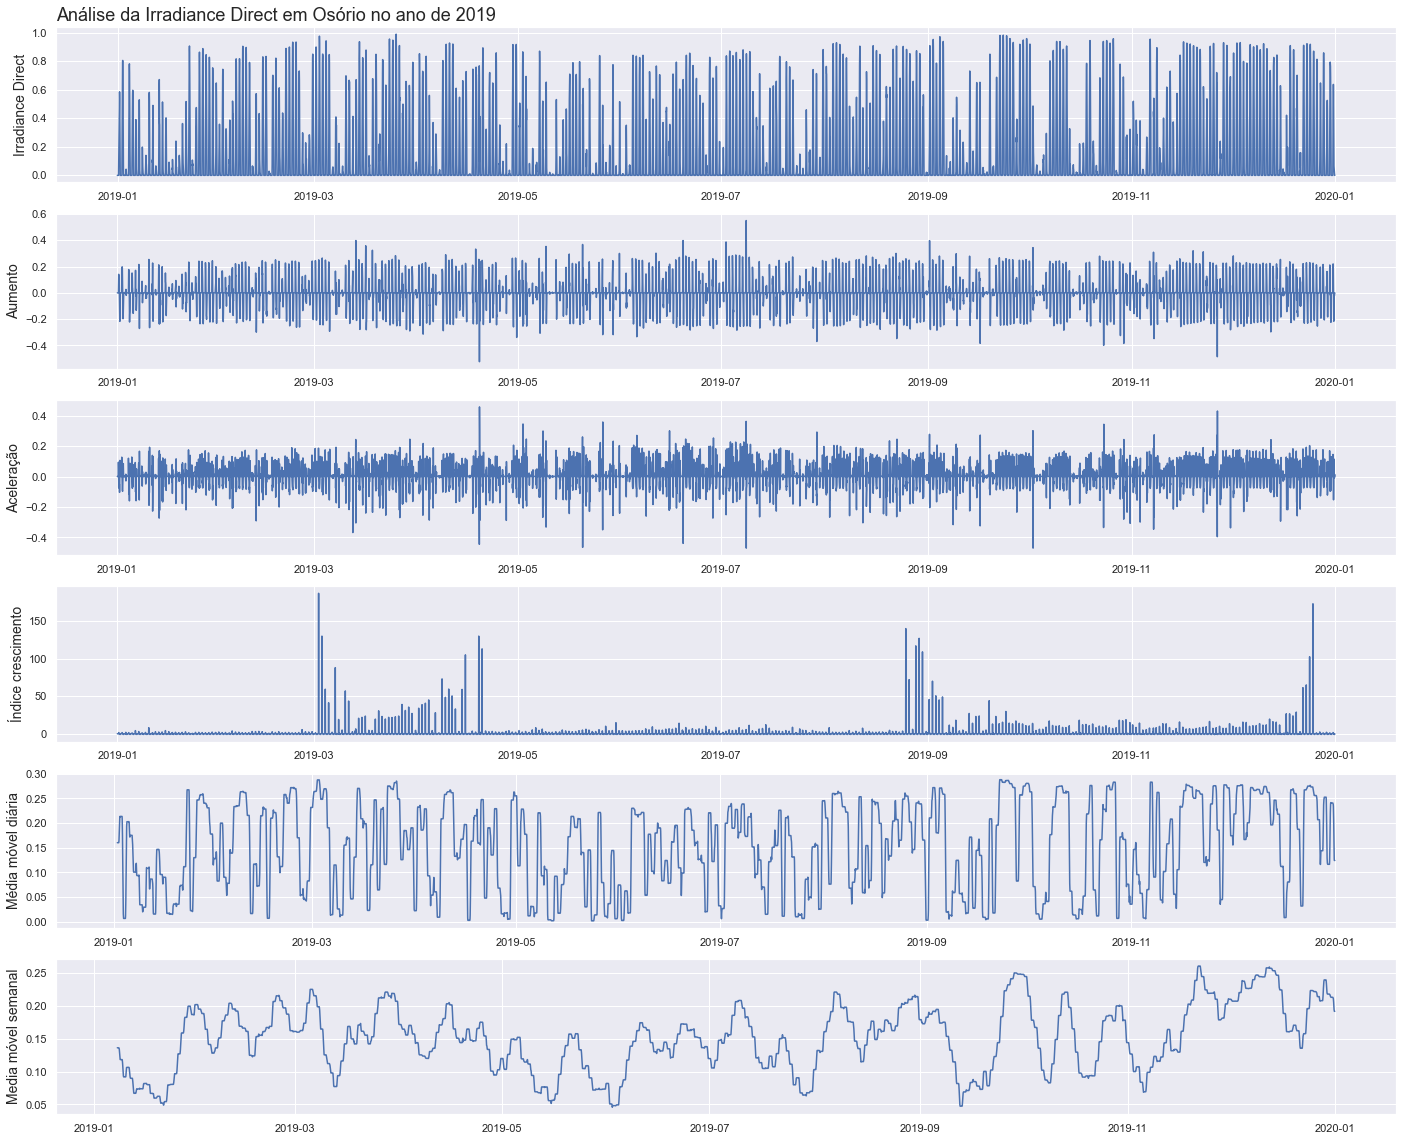

In [11]:
plt.figure(figsize=(24,20))

ax = plt.subplot(6,1,1)
ax.set_title('Análise da Irradiance Direct em Osório no ano de 2019',fontsize=18, loc='left')
lp_irradiance_direct = sns.lineplot(x='local_time', y='irradiance_direct', data=pv)
lp_irradiance_direct.set_xlabel('')
lp_irradiance_direct.set_ylabel('Irradiance Direct', fontsize=14);

plt.subplot(6,1,2)
lp_aumento = sns.lineplot(x='local_time', y='idirect_aumento', data=pv)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(6,1,3)
lp_aceleracao = sns.lineplot(x='local_time', y='idirect_aceleracao', data=pv)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(6,1,4)
lp_crescimento = sns.lineplot(x='local_time', y='idirect_crescimento', data=pv)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Índice crescimento', fontsize=14);

plt.subplot(6,1,5)
lp_mm_dia = sns.lineplot(x='local_time', y='idirect_media_movel_dia', data=pv)
lp_mm_dia.set_xlabel('')
lp_mm_dia.set_ylabel('Média móvel diária', fontsize=14);

plt.subplot(6,1,6)
lp_mm_semana = sns.lineplot(x='local_time', y='idirect_media_movel_semana', data=pv)
lp_mm_semana.set_xlabel('')
lp_mm_semana.set_ylabel('Media móvel semanal', fontsize=14);

#### Autocorrelação

In [12]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento'],
      dtype='object')

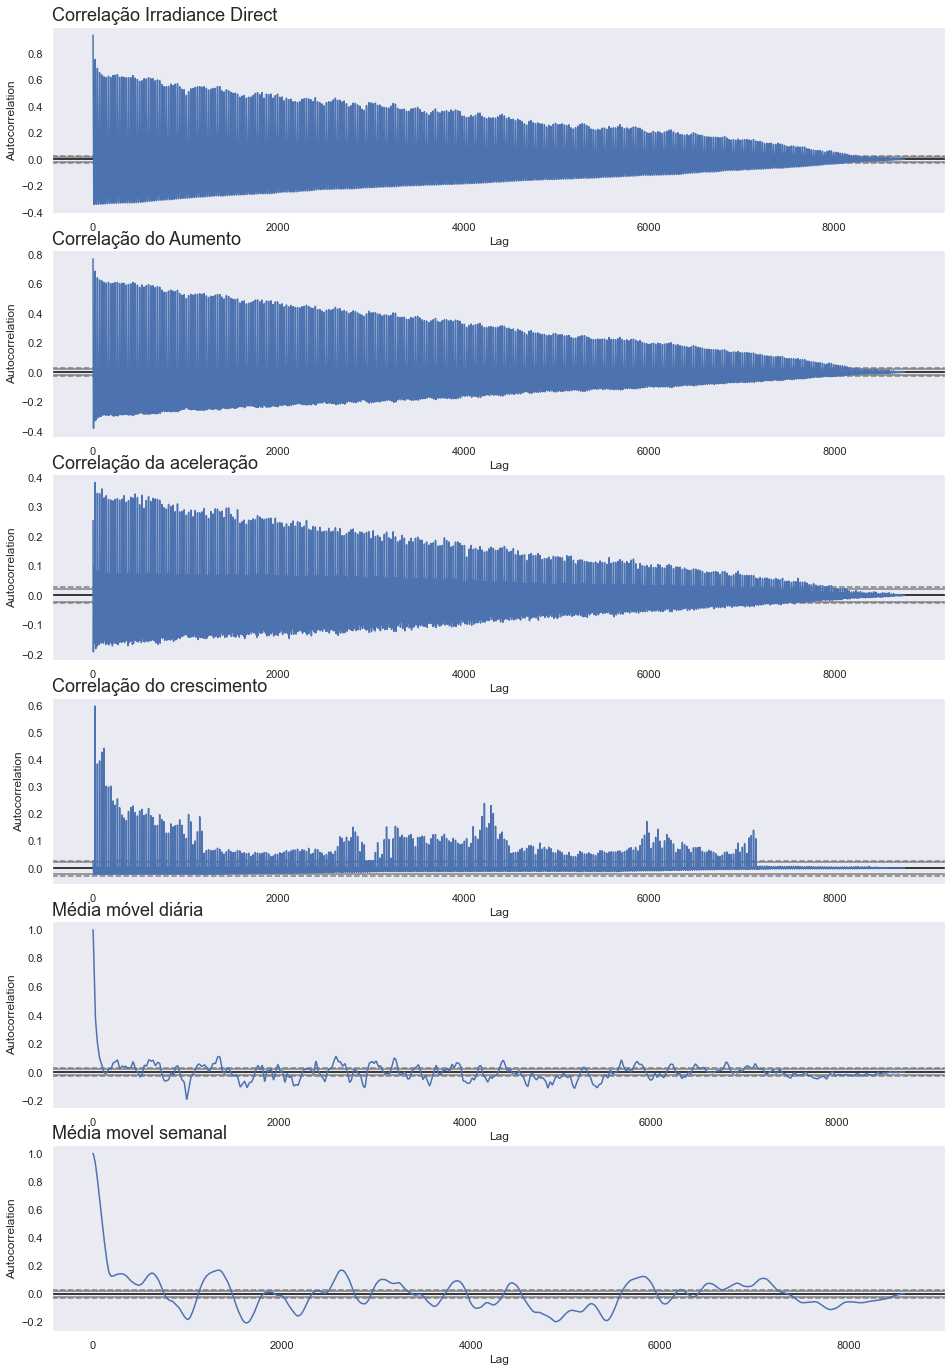

In [13]:
plt.figure(figsize=(16,24))

ac_irradiance_direct = plt.subplot(6,1,1)
autocorrelation_plot(pv['irradiance_direct'], ax = ac_irradiance_direct);
ac_irradiance_direct.set_title('Correlação Irradiance Direct', fontsize = 18, loc='left')


ac_aumento = plt.subplot(6,1,2)
autocorrelation_plot(pv['idirect_aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(6,1,3)
autocorrelation_plot(pv['idirect_aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc = plt.subplot(6,1,4)
autocorrelation_plot(pv['idirect_crescimento'][1:], ax = ac_cresc);
ac_cresc.set_title('Correlação do crescimento', fontsize = 18, loc='left');

ac_mm_dia = plt.subplot(6,1,5)
autocorrelation_plot(pv['idirect_media_movel_dia'][24:], ax = ac_mm_dia);
ac_mm_dia.set_title('Média móvel diária', fontsize = 18, loc='left');

ac_mm_semana = plt.subplot(6,1,6)
autocorrelation_plot(pv['idirect_media_movel_semana'][(24 * 7):], ax = ac_mm_semana);
ac_mm_semana.set_title('Média movel semanal', fontsize = 18, loc='left');

### `irradiance_diffuse`

In [14]:
pv['idiffuse_aumento'] = pv[['irradiance_diffuse']].diff()
pv['idiffuse_aceleracao'] = pv['idiffuse_aumento'].diff()
pv['idiffuse_media_movel_dia'] = pv['irradiance_diffuse'].rolling(24).mean()
pv['idiffuse_media_movel_semana'] = pv['irradiance_diffuse'].rolling(24 * 7).mean()

crescimento = np.array([np.NaN])
for index in range(1, len(pv.irradiance_diffuse)):
    anterior = pv.irradiance_diffuse[index - 1]
    c = round(((pv.irradiance_diffuse[index] / anterior) - 1), 2) if anterior > 0 else 0
    crescimento = np.append(crescimento, c)
pv['idiffuse_crescimento'] = crescimento
pv

,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,idirect_aumento,idirect_aceleracao,idirect_media_movel_dia,idirect_media_movel_semana,idirect_crescimento,idiffuse_aumento,idiffuse_aceleracao,idiffuse_media_movel_dia,idiffuse_media_movel_semana,idiffuse_crescimento
0,2018-12-31 22:00:00,0.000,0.000,0.000,24.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-31 23:00:00,0.000,0.000,0.000,23.979,0.000,NaN,NaN,NaN,0.00,0.000,NaN,NaN,NaN,0.00
2,2019-01-01 00:00:00,0.000,0.000,0.000,23.806,0.000,0.000,NaN,NaN,0.00,0.000,0.000,NaN,NaN,0.00
3,2019-01-01 01:00:00,0.000,0.000,0.000,23.679,0.000,0.000,NaN,NaN,0.00,0.000,0.000,NaN,NaN,0.00
4,2019-01-01 02:00:00,0.000,0.000,0.000,23.633,0.000,0.000,NaN,NaN,0.00,0.000,0.000,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 17:00:00,0.215,0.037,0.231,29.056,-0.013,0.002,0.12700,0.192190,-0.26,-0.062,-0.012,0.114917,0.086125,-0.21
8756,2019-12-31 18:00:00,0.126,0.014,0.149,28.214,-0.023,-0.010,0.12425,0.191524,-0.62,-0.082,-0.020,0.116083,0.086565,-0.35
8757,2019-12-31 19:00:00,0.028,0.000,0.047,26.889,-0.014,0.009,0.12425,0.191524,-1.00,-0.102,-0.020,0.115333,0.086530,-0.68
8758,2019-12-31 20:00:00,0.000,0.000,0.001,25.714,0.000,0.014,0.12425,0.191524,0.00,-0.046,0.056,0.115250,0.086518,-0.98


In [15]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento'],
      dtype='object')

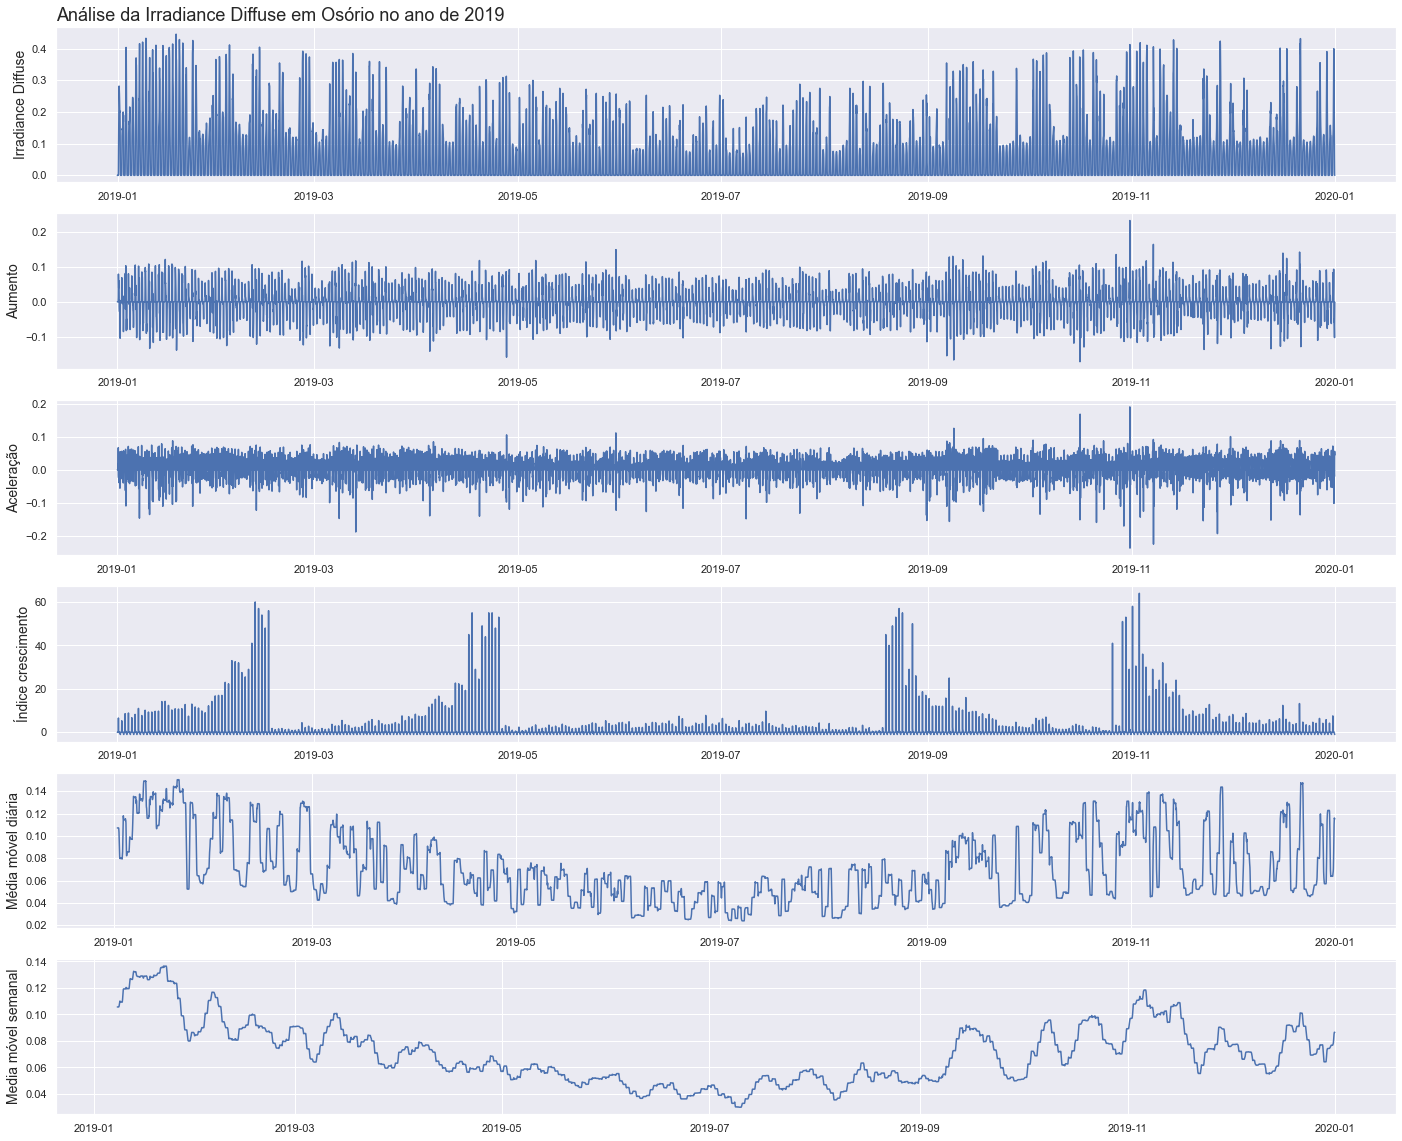

In [16]:
plt.figure(figsize=(24,20))

ax = plt.subplot(6,1,1)
ax.set_title('Análise da Irradiance Diffuse em Osório no ano de 2019',fontsize=18, loc='left')
lp_irradiance_direct = sns.lineplot(x='local_time', y='irradiance_diffuse', data=pv)
lp_irradiance_direct.set_xlabel('')
lp_irradiance_direct.set_ylabel('Irradiance Diffuse', fontsize=14);

plt.subplot(6,1,2)
lp_aumento = sns.lineplot(x='local_time', y='idiffuse_aumento', data=pv)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(6,1,3)
lp_aceleracao = sns.lineplot(x='local_time', y='idiffuse_aceleracao', data=pv)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(6,1,4)
lp_crescimento = sns.lineplot(x='local_time', y='idiffuse_crescimento', data=pv)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Índice crescimento', fontsize=14);

plt.subplot(6,1,5)
lp_mm_dia = sns.lineplot(x='local_time', y='idiffuse_media_movel_dia', data=pv)
lp_mm_dia.set_xlabel('')
lp_mm_dia.set_ylabel('Média móvel diária', fontsize=14);

plt.subplot(6,1,6)
lp_mm_semana = sns.lineplot(x='local_time', y='idiffuse_media_movel_semana', data=pv)
lp_mm_semana.set_xlabel('')
lp_mm_semana.set_ylabel('Media móvel semanal', fontsize=14);

#### Autocorrelação

In [17]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento'],
      dtype='object')

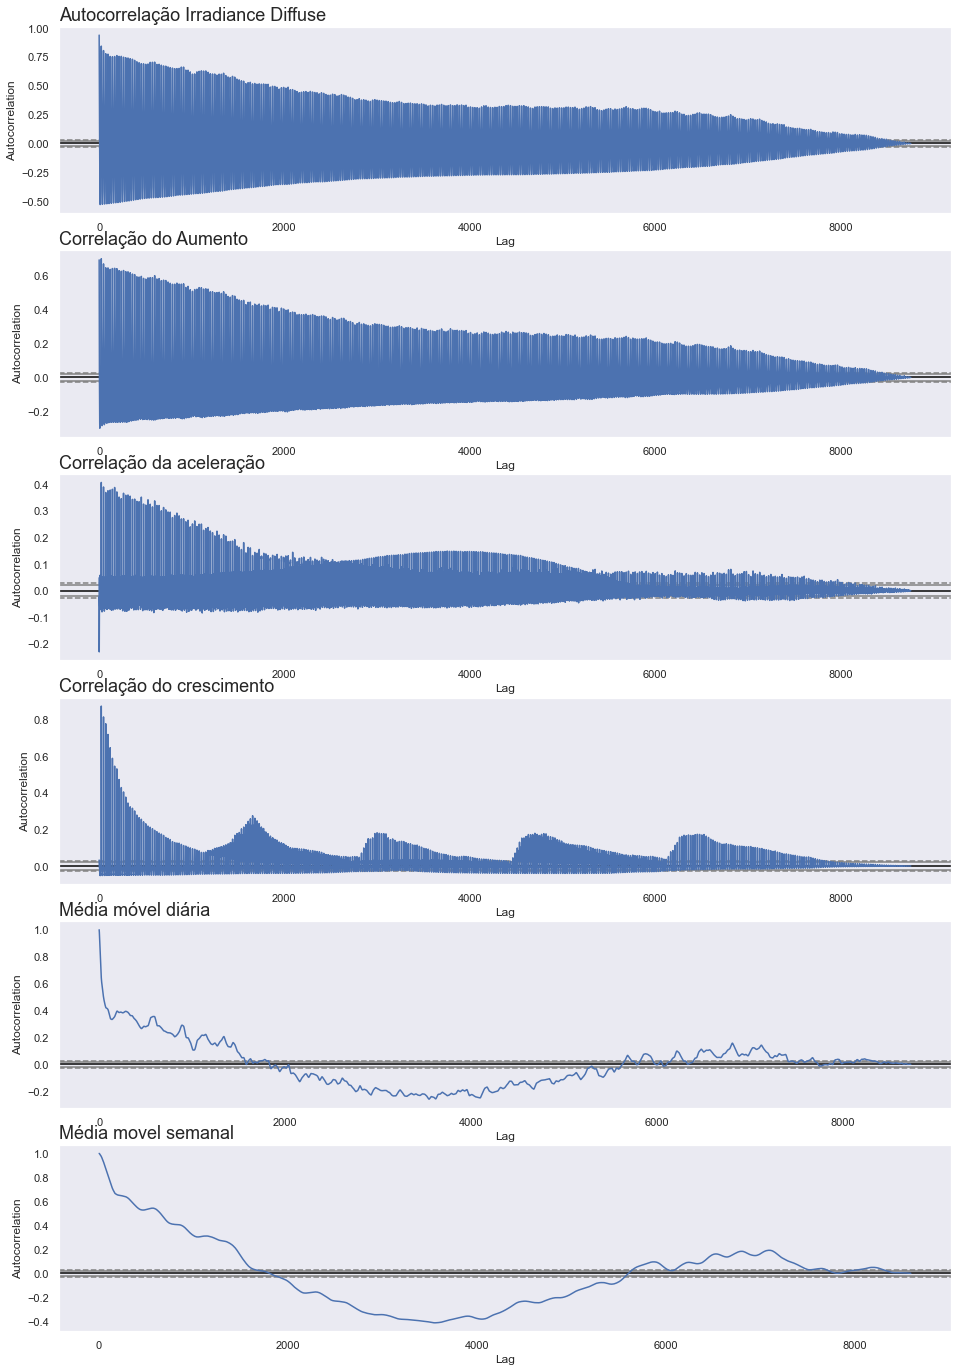

In [18]:
plt.figure(figsize=(16,24))

ac_irradiance_direct = plt.subplot(6,1,1)
autocorrelation_plot(pv['irradiance_diffuse'], ax = ac_irradiance_direct);
ac_irradiance_direct.set_title('Autocorrelação Irradiance Diffuse', fontsize = 18, loc='left')


ac_aumento = plt.subplot(6,1,2)
autocorrelation_plot(pv['idiffuse_aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(6,1,3)
autocorrelation_plot(pv['idiffuse_aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc = plt.subplot(6,1,4)
autocorrelation_plot(pv['idiffuse_crescimento'][1:], ax = ac_cresc);
ac_cresc.set_title('Correlação do crescimento', fontsize = 18, loc='left');

ac_mm_dia = plt.subplot(6,1,5)
autocorrelation_plot(pv['idiffuse_media_movel_dia'][24:], ax = ac_mm_dia);
ac_mm_dia.set_title('Média móvel diária', fontsize = 18, loc='left');

ac_mm_semana = plt.subplot(6,1,6)
autocorrelation_plot(pv['idiffuse_media_movel_semana'][(24 * 7):], ax = ac_mm_semana);
ac_mm_semana.set_title('Média movel semanal', fontsize = 18, loc='left');

### `temperature`

In [19]:
pv['temp_aumento'] = pv[['temperature']].diff()
pv['temp_aceleracao'] = pv['temp_aumento'].diff()
pv['temp_media_movel_dia'] = pv['temperature'].rolling(24).mean()
pv['temp_media_movel_semana'] = pv['temperature'].rolling(24 * 7).mean()

crescimento = np.array([np.NaN])
for index in range(1, len(pv.temperature)):
    anterior = pv.temperature[index - 1]
    c = round(((pv.temperature[index] / anterior) - 1), 2) if anterior > 0 else 0
    crescimento = np.append(crescimento, c)
pv['temp_crescimento'] = crescimento
pv.sample(5)

,local_time,electricity,irradiance_direct,irradiance_diffuse,temperature,idirect_aumento,idirect_aceleracao,idirect_media_movel_dia,idirect_media_movel_semana,idirect_crescimento,idiffuse_aumento,idiffuse_aceleracao,idiffuse_media_movel_dia,idiffuse_media_movel_semana,idiffuse_crescimento,temp_aumento,temp_aceleracao,temp_media_movel_dia,temp_media_movel_semana,temp_crescimento
8688,2019-12-28 22:00:00,0.000,0.000,0.000,24.023,0.000,0.000,0.252458,0.239214,0.00,0.000,0.003,0.057167,0.064244,0.00,-0.515,0.266,25.443083,23.363375,-0.02
5645,2019-08-24 02:00:00,0.000,0.000,0.000,10.499,0.000,0.000,0.165167,0.162185,0.00,0.000,0.000,0.060458,0.057417,0.00,0.053,0.056,12.586875,13.073488,0.01
5390,2019-08-13 11:00:00,0.673,0.641,0.156,11.031,0.281,0.124,0.069083,0.139214,0.78,-0.040,-0.061,0.065667,0.056821,-0.20,0.691,0.085,13.010583,16.575738,0.07
2482,2019-04-14 07:00:00,0.099,0.060,0.068,22.108,0.059,0.058,0.129958,0.180768,59.00,0.065,0.062,0.079375,0.059750,21.67,0.680,0.694,22.784375,20.975583,0.03
381,2019-01-16 19:00:00,0.021,0.000,0.038,26.940,-0.002,-0.001,0.017083,0.080048,-1.00,-0.057,-0.022,0.130583,0.126214,-0.60,-0.359,-0.245,26.418208,25.431899,-0.01


In [20]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento', 'temp_aumento', 'temp_aceleracao',
       'temp_media_movel_dia', 'temp_media_movel_semana', 'temp_crescimento'],
      dtype='object')

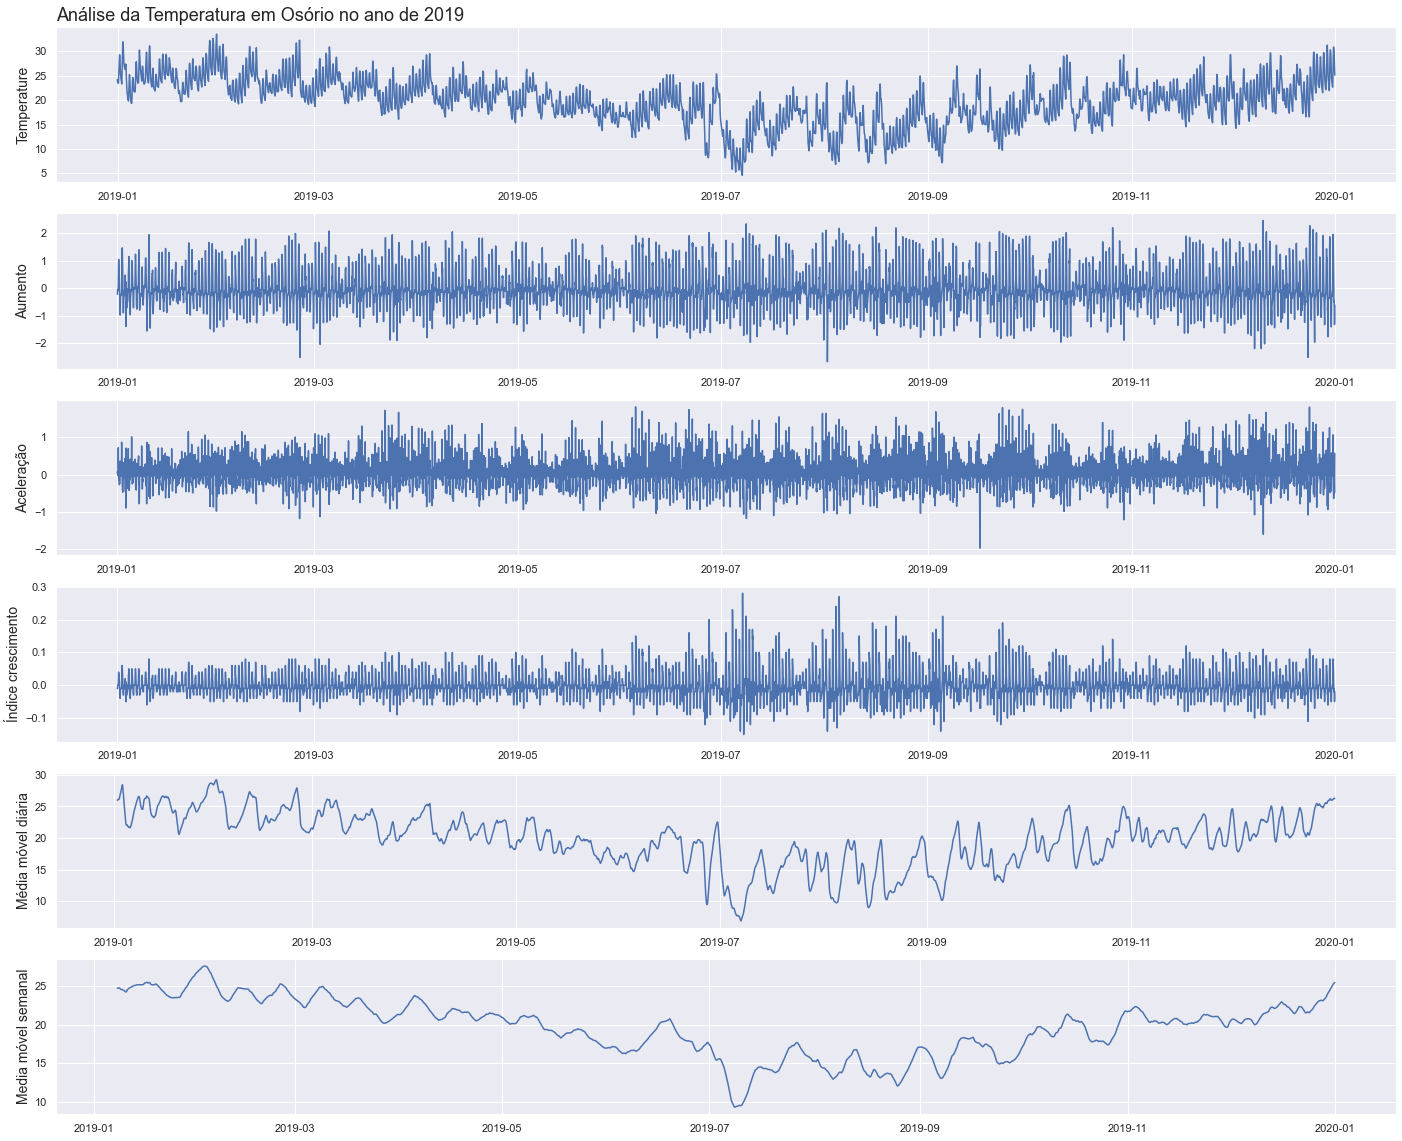

In [21]:
plt.figure(figsize=(24,20))

ax = plt.subplot(6,1,1)
ax.set_title('Análise da Temperatura em Osório no ano de 2019',fontsize=18, loc='left')
lp_temperature = sns.lineplot(x='local_time', y='temperature', data=pv)
lp_temperature.set_xlabel('')
lp_temperature.set_ylabel('Temperature', fontsize=14);

plt.subplot(6,1,2)
lp_aumento = sns.lineplot(x='local_time', y='temp_aumento', data=pv)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(6,1,3)
lp_aceleracao = sns.lineplot(x='local_time', y='temp_aceleracao', data=pv)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(6,1,4)
lp_crescimento = sns.lineplot(x='local_time', y='temp_crescimento', data=pv)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Índice crescimento', fontsize=14);

plt.subplot(6,1,5)
lp_mm_dia = sns.lineplot(x='local_time', y='temp_media_movel_dia', data=pv)
lp_mm_dia.set_xlabel('')
lp_mm_dia.set_ylabel('Média móvel diária', fontsize=14);

plt.subplot(6,1,6)
lp_mm_semana = sns.lineplot(x='local_time', y='temp_media_movel_semana', data=pv)
lp_mm_semana.set_xlabel('')
lp_mm_semana.set_ylabel('Media móvel semanal', fontsize=14);

#### Autocorrelação

In [22]:
pv.columns

Index(['local_time', 'electricity', 'irradiance_direct', 'irradiance_diffuse',
       'temperature', 'idirect_aumento', 'idirect_aceleracao',
       'idirect_media_movel_dia', 'idirect_media_movel_semana',
       'idirect_crescimento', 'idiffuse_aumento', 'idiffuse_aceleracao',
       'idiffuse_media_movel_dia', 'idiffuse_media_movel_semana',
       'idiffuse_crescimento', 'temp_aumento', 'temp_aceleracao',
       'temp_media_movel_dia', 'temp_media_movel_semana', 'temp_crescimento'],
      dtype='object')

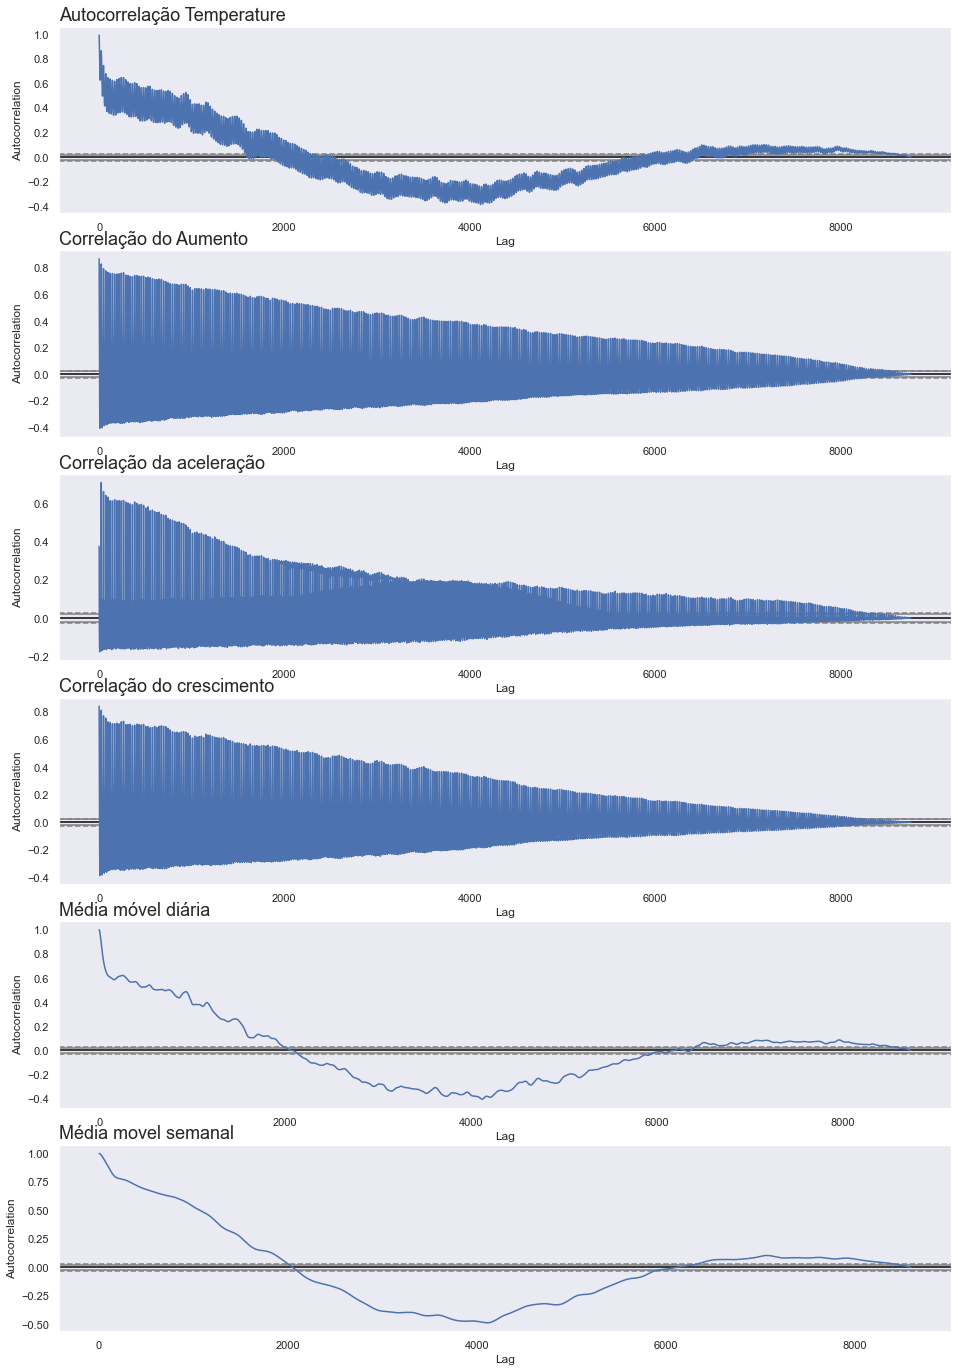

In [23]:
plt.figure(figsize=(16,24))

ac_temperature = plt.subplot(6,1,1)
autocorrelation_plot(pv['temperature'], ax = ac_temperature);
ac_temperature.set_title('Autocorrelação Temperature', fontsize = 18, loc='left')


ac_aumento = plt.subplot(6,1,2)
autocorrelation_plot(pv['temp_aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(6,1,3)
autocorrelation_plot(pv['temp_aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc = plt.subplot(6,1,4)
autocorrelation_plot(pv['temp_crescimento'][1:], ax = ac_cresc);
ac_cresc.set_title('Correlação do crescimento', fontsize = 18, loc='left');

ac_mm_dia = plt.subplot(6,1,5)
autocorrelation_plot(pv['temp_media_movel_dia'][24:], ax = ac_mm_dia);
ac_mm_dia.set_title('Média móvel diária', fontsize = 18, loc='left');

ac_mm_semana = plt.subplot(6,1,6)
autocorrelation_plot(pv['temp_media_movel_semana'][(24 * 7):], ax = ac_mm_semana);
ac_mm_semana.set_title('Média movel semanal', fontsize = 18, loc='left');

## Salvando o dataset completo

In [24]:
pv.to_csv('pv_osorio_2019_analise.csv')